In [ ]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import numpy as np
import pandas as pd

In [ ]:
data=pd.read_csv('/content/train.csv')

In [ ]:
test=pd.read_csv('/content/test.csv')

In [ ]:
data.shape

(44100, 4)

In [ ]:
data.head(2)

,ID,author,Review,Sentiment
0,39467,rayinstirling,Today I'm working on my &quot;Quirky Q&quot; c...,2
1,30154,DirtyRose17,@ShannonElizab dont ya know? people love the h...,1


In [ ]:
test.shape

(18900, 3)

In [ ]:
test.head(2)

,ID,author,Review
0,29536,nathantbaker,@amyswarren ahhh yay! I'm getting into it. Kno...
1,13442,Umatter2Chtr,@DeliverImHungry You are right. If you ordere...


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 44100 entries, 0 to 44099
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   ID         44100 non-null  int64 
 1   author     44100 non-null  object
 2   Review     44100 non-null  object
 3   Sentiment  44100 non-null  int64 
dtypes: int64(2), object(2)
memory usage: 1.3+ MB


In [ ]:
data.isnull().sum()

ID           0
author       0
Review       0
Sentiment    0
dtype: int64

In [ ]:
test.isnull().sum()

ID        0
author    0
Review    0
dtype: int64

In [ ]:
test=test.fillna(" ")

In [ ]:
test.isnull().sum()

ID        0
author    0
Review    0
dtype: int64

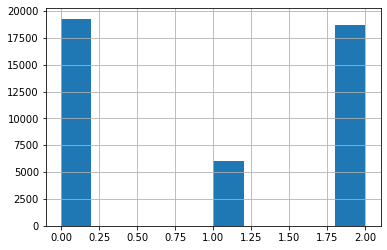

In [ ]:
data['Sentiment'].hist()

In [ ]:
x=data.drop(['Sentiment'],1)

In [ ]:
y=data['Sentiment']

In [ ]:
x.head(2)

,ID,author,Review
0,39467,rayinstirling,Today I'm working on my &quot;Quirky Q&quot; c...
1,30154,DirtyRose17,@ShannonElizab dont ya know? people love the h...


In [ ]:
y.value_counts()

0    19299
2    18733
1     6068
Name: Sentiment, dtype: int64

In [ ]:
import tensorflow as tf
from tensorflow.keras.layers import Embedding
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.preprocessing.text import one_hot
from tensorflow.keras.layers import LSTM , Dense , Bidirectional , Dropout
import nltk
import re
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
from sklearn.metrics import accuracy_score

In [ ]:
vocabulary_size=6000

In [ ]:
news=x.copy()

In [ ]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [ ]:
news['Review']=news['Review']+news['author']

In [ ]:
test['Review']=test['Review']+test['author']

In [ ]:
ps=PorterStemmer()

In [ ]:
corpus=[]

In [ ]:
news['Review'][0]

"Today I'm working on my &quot;Quirky Q&quot; cue or maybe it will become a concertorayinstirling"

In [ ]:
re.sub('[^a-zA-Z]' , " ", news['Review'][0])

'Today I m working on my  quot Quirky Q quot  cue or maybe it will become a concertorayinstirling'

In [ ]:
re.sub('[^a-zA-Z]' , " ", news['Review'][0]).lower()

'today i m working on my  quot quirky q quot  cue or maybe it will become a concertorayinstirling'

In [ ]:
words=re.sub('[^a-zA-Z]' , " ", news['Review'][0]).lower().split()
words

['today',
 'i',
 'm',
 'working',
 'on',
 'my',
 'quot',
 'quirky',
 'q',
 'quot',
 'cue',
 'or',
 'maybe',
 'it',
 'will',
 'become',
 'a',
 'concertorayinstirling']

In [ ]:
[ps.stem(word) for word in words if not word in stopwords.words('english')]

['today',
 'work',
 'quot',
 'quirki',
 'q',
 'quot',
 'cue',
 'mayb',
 'becom',
 'concertorayinstirl']

In [ ]:
for i in range(len(news)):
    title=re.sub('[^a-zA-Z]' , " ", news['Review'][i]).lower().split()
    title= [ps.stem(word) for word in title if not word in stopwords.words('english')]
    title=' '.join(title)
    corpus.append(title)

In [ ]:
corpus_test=[]
for i in range(len(test)):
    title=re.sub('[^a-zA-Z]' , " ", test['Review'][i]).lower().split()
    title= [ps.stem(word) for word in title if not word in stopwords.words('english')]
    title=' '.join(title)
    corpus_test.append(title)

In [ ]:
len(corpus_test)

18900

In [ ]:
corpus[:4]

['today work quot quirki q quot cue mayb becom concertorayinstirl',
 'shannonelizab dont ya know peopl love human societydirtyros',
 'ughhh reject mediat program suckssss yoliemichel',
 'petewentz im jealou want octo drivejayamelwani']

In [ ]:
onehot_representation=[one_hot(words , vocabulary_size) for words in corpus] 

In [ ]:
onehot_representation_test=[one_hot(words , vocabulary_size) for words in corpus_test] 

In [ ]:
onehot_representation[:5]

[[4318, 3736, 3509, 1928, 635, 3509, 1753, 1403, 3959, 5210],
 [2543, 5836, 4876, 971, 554, 3748, 5336, 3752],
 [1311, 317, 2741, 1117, 1651, 781],
 [2557, 3144, 99, 2172, 2795, 1397],
 [1853,
  3461,
  2932,
  3983,
  2849,
  1489,
  3684,
  2220,
  1905,
  2215,
  2638,
  587,
  5342,
  3117,
  5198,
  5834,
  4122,
  2638,
  5596,
  5596,
  1831,
  4864,
  3983,
  4919,
  4685,
  3155,
  2928,
  4457,
  1459,
  675,
  5834,
  4122,
  1722,
  110,
  1403,
  58,
  230,
  5543,
  2016,
  4122,
  1250,
  207,
  2799,
  1689,
  415,
  1239,
  5834,
  465,
  1146,
  2386,
  2053,
  2144,
  1740,
  1722,
  5342,
  3117,
  5596,
  5596,
  2146,
  4290,
  2533,
  4122,
  230,
  1413,
  4382,
  1489,
  1669,
  912,
  4160,
  3436,
  2410,
  1121,
  138,
  3748,
  4737,
  3336,
  1146,
  4626,
  2053,
  5834,
  5596,
  5596,
  465,
  4290,
  3232,
  2146,
  3232,
  1364,
  1915,
  2220,
  1905,
  5834,
  5559,
  2215,
  5107,
  4826,
  5868,
  2861,
  5691,
  4985,
  3196,
  4826,
  2211,
  16

In [ ]:
padding_length=25
padded_title=pad_sequences(onehot_representation , padding='pre' , maxlen=padding_length)

In [ ]:
padded_title_test=pad_sequences(onehot_representation_test , padding='pre' , maxlen=padding_length)

In [ ]:
padded_title[:5]

array([[   0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0, 4318, 3736, 3509, 1928,  635, 3509, 1753,
        1403, 3959, 5210],
       [   0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0,    0,    0, 2543, 5836, 4876,  971,  554,
        3748, 5336, 3752],
       [   0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0,    0,    0,    0,    0, 1311,  317, 2741,
        1117, 1651,  781],
       [   0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0,    0,    0,    0,    0, 2557, 3144,   99,
        2172, 2795, 1397],
       [1489, 2749, 1941,  706, 4427, 2494, 2318, 5295, 5683,  153, 2177,
        4572, 1853, 4992, 3983, 3648, 4985, 5303, 2153, 2520, 5596, 5596,
        4626,  319, 4056]], dtype=int32)

In [ ]:
len(padded_title)

44100

In [ ]:
y.shape

(44100,)

In [ ]:
x=np.array(padded_title)
y=np.array(y)

In [ ]:
x_test=np.array(padded_title_test)

In [ ]:
model2=Sequential([
    Embedding(vocabulary_size , 40, input_length=padding_length),
    Dropout(0.3),
    LSTM(100),
    Dropout(0.3),
    Dense(64,activation='relu'),
    Dropout(0.3),
    Dense(1,activation='sigmoid')
])
model2.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])

In [ ]:
history=model2.fit(x,y,epochs=100,batch_size=64)

Epoch 1/100
690/690 [==============================] - 6s 8ms/step - loss: -12402.2422 - accuracy: 0.2869
Epoch 2/100
690/690 [==============================] - 6s 9ms/step - loss: -14977.1494 - accuracy: 0.2819
Epoch 3/100
690/690 [==============================] - 6s 9ms/step - loss: -18370.3984 - accuracy: 0.2863
Epoch 4/100
690/690 [==============================] - 6s 9ms/step - loss: -21876.8594 - accuracy: 0.2890
Epoch 5/100
690/690 [==============================] - 6s 9ms/step - loss: -25692.9004 - accuracy: 0.2895
Epoch 6/100
690/690 [==============================] - 6s 9ms/step - loss: -29356.8984 - accuracy: 0.2918
Epoch 7/100
690/690 [==============================] - 6s 8ms/step - loss: -33121.0742 - accuracy: 0.2916
Epoch 8/100
690/690 [==============================] - 6s 8ms/step - loss: -37135.3203 - accuracy: 0.2891
Epoch 9/100
690/690 [==============================] - 6s 8ms/step - loss: -43068.6055 - accuracy: 0.2932
Epoch 10/100
690/690 [========================

In [ ]:
import matplotlib.pyplot as plt

Text(0.5, 0, 'epoch')

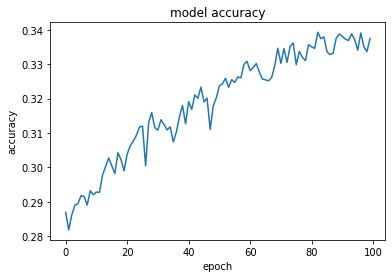

In [ ]:
plt.plot(history.history['accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')

In [ ]:
pred=model2.predict_classes(x_test)

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/sequential.py:455: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


In [ ]:
pred.shape

(18900, 1)

In [ ]:
submission_data = pd.read_csv('/content/submission.csv')

In [ ]:
submission_data['label']=pred

In [ ]:
submission_data.to_csv('submitnew.csv' ,index=False)

In [ ]:
submission_data.head()

,Negative_0,Neutral_1,Positive_2,label
0,0,1,0,1
1,1,0,0,0
2,0,0,1,0
3,0,0,0,1
4,0,0,0,0


In [ ]:
submission_data.drop(['label'],axis='columns',inplace=True)

In [ ]:
submission_data.head()

,Negative_0,Neutral_1,Positive_2
0,0,1,0
1,1,0,0
2,0,0,1
3,0,0,0
4,0,0,0


In [ ]:
submission_data.to_csv('submitnew1.csv' ,index=False)